In [ ]:
# importing pandas library for data maniplulation and analysis
import pandas as pd

# encode ordinal column into labels by importing a preprocessing from sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# importing the kNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# importing the classification_report from sklearn
from sklearn.metrics import classification_report

#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix

#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Import the packages for plotting the Roc Curve
from sklearn.metrics import RocCurveDisplay

#Import the packages for GaussianNB
from sklearn.naive_bayes import GaussianNB

# import the class
from sklearn.linear_model import LogisticRegression

# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score

#Import packages to plot a chart for different k values
import numpy as np
import matplotlib.pyplot as plt

# To tune our hyperparameters
from sklearn.model_selection import GridSearchCV

# Visualise DS
import plotly.express as px

In [ ]:
# reading the file using pandas
df = pd.read_csv('/content/Mortality_Status.csv')
# looking at a sample of the data set (DS)
df.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68,0,0,0,1,3,1,4,1,1,24,1,60,1
1,50,1,1,2,0,2,1,35,1,1,14,5,62,1
2,58,2,2,4,0,2,1,63,1,1,14,7,75,1
3,58,0,0,0,1,3,1,18,1,1,2,1,84,1
4,47,1,0,1,1,3,1,41,1,1,3,1,50,1


In [ ]:
#checking how many features there are
list(df.columns)

['Age',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Regional_Node_Positive',
 'Survival_Months',
 'Mortality_Status']

In [ ]:
# check number of rows and columns DS
df.shape

(4020, 14)

In [ ]:
# explore the data types for all variables also known as variable scale type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4020 non-null   int64
 1   T_Stage                 4020 non-null   int64
 2   N_Stage                 4020 non-null   int64
 3   6th_Stage               4020 non-null   int64
 4   Differentiated          4020 non-null   int64
 5   Grade                   4020 non-null   int64
 6   A_Stage                 4020 non-null   int64
 7   Tumor_Size              4020 non-null   int64
 8   Estrogen_Status         4020 non-null   int64
 9   Progesterone_Status     4020 non-null   int64
 10  Regional_Node_Examined  4020 non-null   int64
 11  Regional_Node_Positive  4020 non-null   int64
 12  Survival_Months         4020 non-null   int64
 13  Mortality_Status        4020 non-null   int64
dtypes: int64(14)
memory usage: 439.8 KB


In [ ]:
# display the basic descriptive statistics to investigate any issues in the DS for numeric variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4020.0,53.990299,8.971696,30.0,47.0,54.0,61.0,89.0
T_Stage,4020.0,0.784826,0.765464,0.0,0.0,1.0,1.0,3.0
N_Stage,4020.0,0.437562,0.692858,0.0,0.0,0.0,1.0,2.0
6th_Stage,4020.0,1.320647,1.265627,0.0,0.0,1.0,2.0,4.0
Differentiated,4020.0,0.690299,1.016096,0.0,0.0,0.0,1.0,3.0
Grade,4020.0,2.150995,0.638280,1.0,2.0,2.0,3.0,4.0
A_Stage,4020.0,0.977363,0.148761,0.0,1.0,1.0,1.0,1.0
Tumor_Size,4020.0,30.454229,21.094478,1.0,16.0,25.0,38.0,140.0
Estrogen_Status,4020.0,1.066915,0.249907,1.0,1.0,1.0,1.0,2.0
Progesterone_Status,4020.0,1.173383,0.378625,1.0,1.0,1.0,1.0,2.0


In [ ]:
# Ensuring that there are no missing data values I missed out in NB1
df.isna().sum()/len(df)*100

,0
Age,0.0
T_Stage,0.0
N_Stage,0.0
6th_Stage,0.0
Differentiated,0.0
Grade,0.0
A_Stage,0.0
Tumor_Size,0.0
Estrogen_Status,0.0
Progesterone_Status,0.0


In [ ]:
# Creating a dataframe with all training input variables excluding target variable
X = df.drop(columns=['Mortality_Status'])
y = df['Mortality_Status']

In [ ]:
# check the list of target variables
y.head(10)

,Mortality_Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,2
8,1
9,1


In [ ]:
# Splitting the DS into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

# Showing the number of instances and input variables in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (3216, 13)
X_test Instances (804, 13)


In [ ]:
# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Performing predictions on the test data
y_pred_knn=knn.predict(X_test)

# Creating a dataframe (DF) to compare the actual and predicted results by kNN
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_knn})
compare_results_knn_df.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
1583,1,1
3872,1,1
3114,1,1
655,2,2
2226,1,1
...,...,...
3497,1,1
3410,1,1
747,1,1
1668,1,1


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       681
           2       0.77      0.50      0.60       123

    accuracy                           0.90       804
   macro avg       0.84      0.73      0.77       804
weighted avg       0.89      0.90      0.89       804



Based on the confusion matrix below, there are 663 True Positives (Alive), 18 False Negative (Predicted Dead but actually Alive), 62 False Positives (Predicted Alive but actually Dead), and 61 True Negatives (Dead)

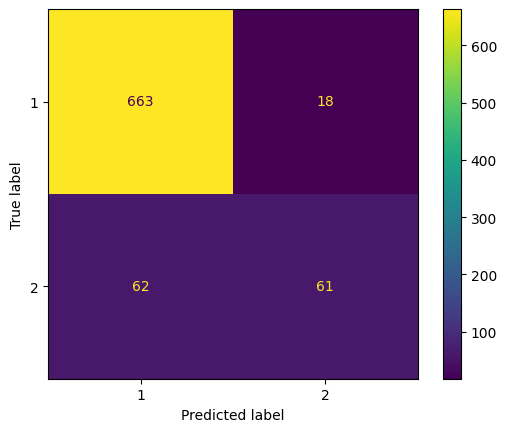

In [ ]:
#comparing actual values (y_test_knn) vs predicted (y_pred_knn) in test data
cm_knn = confusion_matrix(y_test, y_pred_knn, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

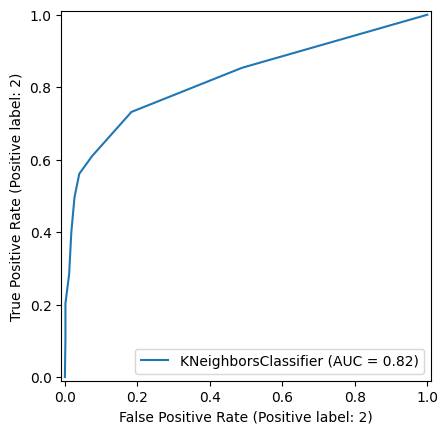

In [ ]:
# 82% indicates high discrimination between Alive & Dead
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Text(0, 0.5, 'Mean Error')

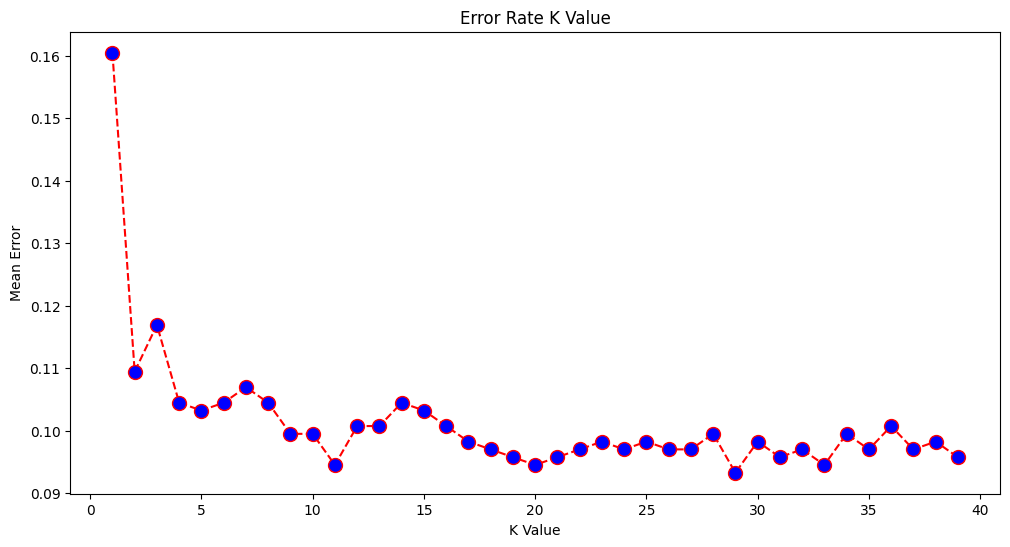

In [ ]:
# Improving the kNN model's test results by creating a loop to find the optimal k that gives the lowest error
# Calculating error for K values between 1 and 40
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 29)
# Fit the classifier to the data
knn1.fit(X_train,y_train)
#Perform predictions on the test data
y_pred_knn1=knn1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn1))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95       681
           2       0.82      0.50      0.62       123

    accuracy                           0.91       804
   macro avg       0.87      0.74      0.78       804
weighted avg       0.90      0.91      0.90       804



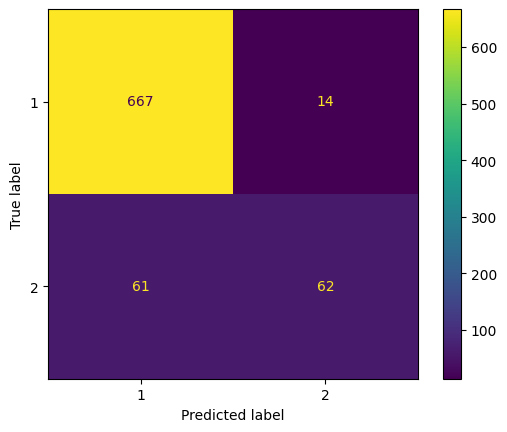

In [ ]:
cm_knn1 = confusion_matrix(y_test, y_pred_knn1, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()

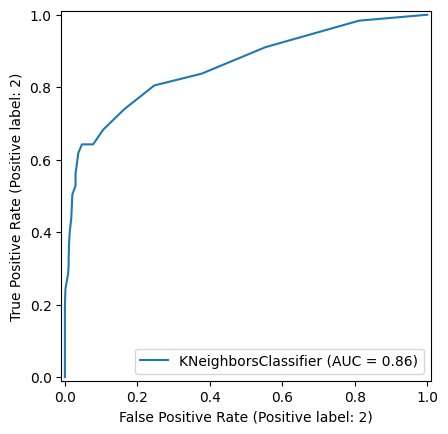

In [ ]:
knn1_roc = RocCurveDisplay.from_estimator(knn1, X_test, y_test)

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

              precision    recall  f1-score   support

           1       0.91      0.98      0.95       681
           2       0.85      0.49      0.62       123

    accuracy                           0.91       804
   macro avg       0.88      0.74      0.78       804
weighted avg       0.90      0.91      0.90       804



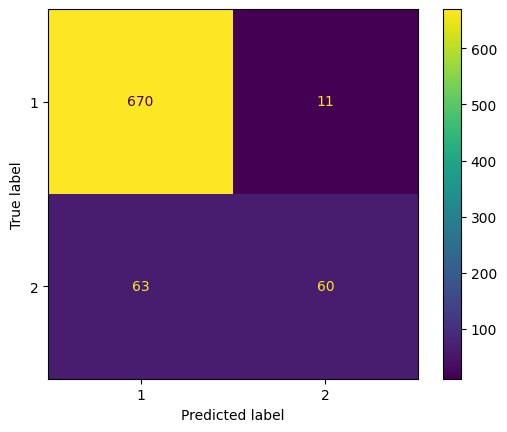

In [ ]:
# Perform testing on test dataset
y_pred_gsKnn = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred_gsKnn, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred_gsKnn))

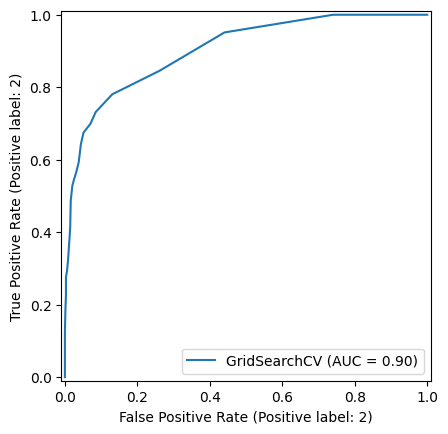

In [ ]:
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)

Building a Naive Bayes Classifier Model

In [ ]:
# Perform Minimum - Maximum Normalisation to scale all input features values between 0 and 1:
X1 = (X - np.min(X)) / (np.max(X) - np.min(X))

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 14, stratify = y)

# Showing the number of instances and input variables in the training and test sets
print('X_train Instances', X1_train.shape)
print('X_test Instances', X1_test.shape)

X_train Instances (3216, 13)
X_test Instances (804, 13)


In [ ]:
nb = GaussianNB()
nb.fit(X1_train, y_train)
y_pred_nb = nb.predict(X1_test)

In [ ]:
# Creating a dataframe (DF) to compare the actual and predicted results by kNN
compare_results_nb_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_nb})
compare_results_nb_df.to_csv(r'/content/nb_pred_comparison.csv', index=True)
compare_results_nb_df

,Actual,Predicted
1583,1,1
3872,1,1
3114,1,1
655,2,2
2226,1,2
...,...,...
3497,1,1
3410,1,1
747,1,1
1668,1,1


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.91      0.84      0.88       681
           2       0.39      0.55      0.46       123

    accuracy                           0.80       804
   macro avg       0.65      0.70      0.67       804
weighted avg       0.83      0.80      0.81       804



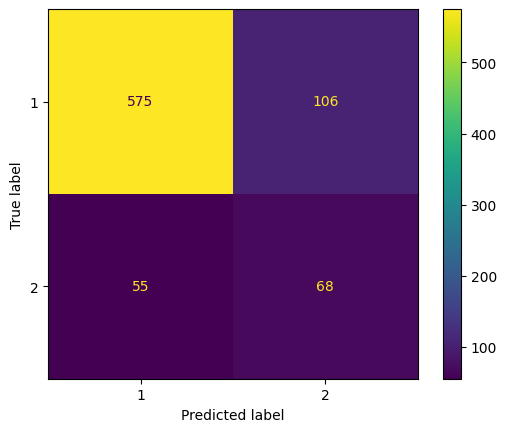

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred_nb, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

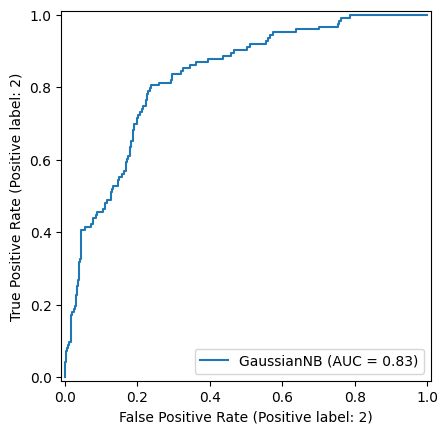

In [ ]:
nb_roc = RocCurveDisplay.from_estimator(nb, X1_test, y_test)

Creating a Binary Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X)

In [ ]:
# split X and y into training and testing sets
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=14, stratify = y)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X2_train, y_train)
y_pred_lr = logreg.predict(X2_test)

In [ ]:
y_pred_lr

array([1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,

In [ ]:
# Making it more readable by putting it in a table to compare actual to predicted results
Comparison_df = pd.DataFrame({'Actual Mortality Status' : y_test,  'Predicted' : y_pred_lr})
Comparison_df.to_csv(r'/content/MortalityStatus_Comparison_df.csv', index=True)
Comparison_df

,Actual Mortality Status,Predicted
1583,1,1
3872,1,1
3114,1,1
655,2,2
2226,1,2
...,...,...
3497,1,1
3410,1,1
747,1,1
1668,1,1


In [ ]:
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_pred_lr)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.9079601990049752


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95       681
           2       0.83      0.50      0.63       123

    accuracy                           0.91       804
   macro avg       0.87      0.74      0.79       804
weighted avg       0.90      0.91      0.90       804



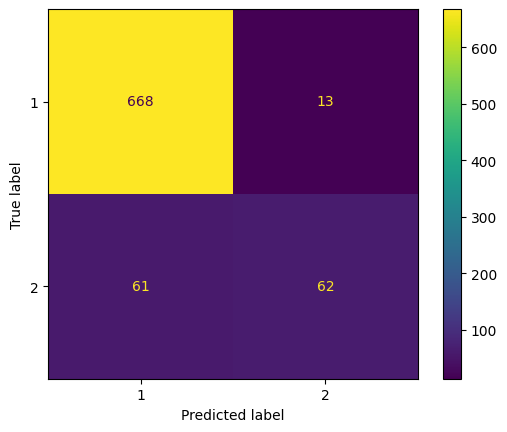

In [ ]:
# Construct the confusion matrix cm
lg_cm = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(lg_cm,display_labels=logreg.classes_)
disp.plot()

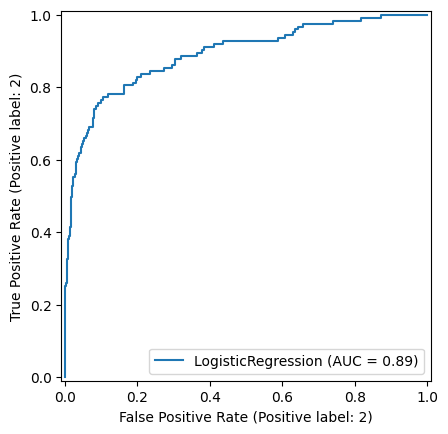

In [ ]:
lr_roc = RocCurveDisplay.from_estimator(logreg, X2_test, y_test)

In [ ]:
# creating hyperparameter grid for tuning logistic regression as it's my best model
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [ ]:
# Using gridsearch to find the best possible cariation of my hyperparameters
# chose cv = 5 because our dataset is medium size
# equating verbose to true so it lets me know that it's not stuck
# n_jobs = -1 utilises all CPU
tuned_lr = GridSearchCV(logreg,param_grid = param_grid, cv = 5, verbose = True, n_jobs=-1)
tuned_lr

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
# fit the parameters found into the test dataset
tuned_lr.fit(X2_train,y_train)
best_param = tuned_lr.best_estimator_
best_param

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

LogisticRegression(C=np.float64(0.08858667904100823), penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred_bplr = best_param.predict(X2_test)
print(classification_report(y_test, y_pred_bplr))

              precision    recall  f1-score   support

           1       0.91      0.98      0.95       681
           2       0.81      0.50      0.62       123

    accuracy                           0.91       804
   macro avg       0.86      0.74      0.78       804
weighted avg       0.90      0.91      0.90       804



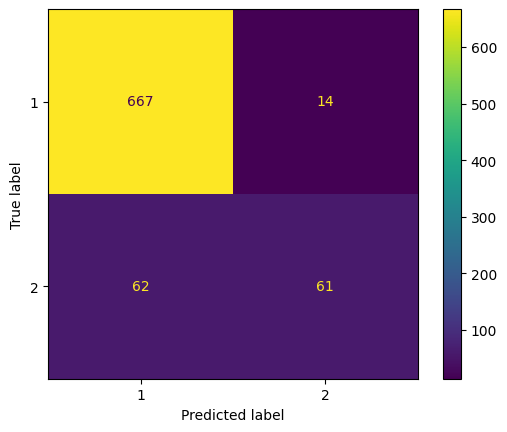

In [ ]:
# Construct the confusion matrix cm
bplr_cm = confusion_matrix(y_test, y_pred_bplr, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(bplr_cm,display_labels=logreg.classes_)
disp.plot()